In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Считываем датасет
df = pd.read_csv('bank.csv', sep=',')
df.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8758,8759,15732621,Martin,663,France,Male,34,10,0.00,1,1,1,114083.73,0
4409,4410,15781598,Middleton,756,Germany,Male,41,6,149049.92,1,0,1,50422.36,1
2695,2696,15639946,Sazonova,597,Germany,Female,39,8,162532.14,3,1,0,36051.46,1
8595,8596,15668774,Chiemenam,758,Germany,Female,23,5,122739.10,1,1,0,102460.84,1
2252,2253,15604782,Tan,733,Germany,Female,33,7,187257.94,1,0,1,190430.81,0
3512,3513,15657779,Boylan,806,Spain,Male,18,3,0.00,2,1,1,86994.54,0
6439,6440,15583371,Artemiev,632,Spain,Male,37,1,138207.08,1,1,0,60778.11,1
3168,3169,15680752,Horrocks,675,France,Female,49,0,0.00,1,1,1,80496.71,1
6664,6665,15667632,Birdseye,703,France,Female,42,7,0.00,2,0,1,72500.68,0
8144,8145,15775108,Lo Duca,571,France,Male,34,1,99325.04,2,0,1,186052.15,0


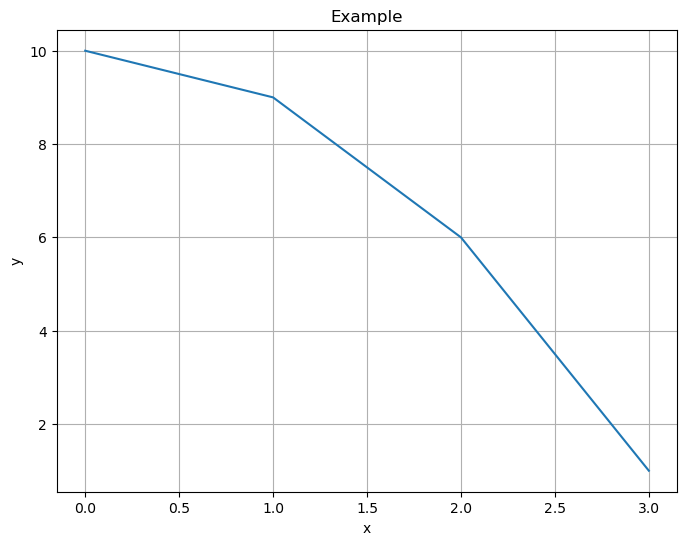

In [6]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

### Виды графиков
#### Линейный график

In [8]:
# Готовим данные для графика в виде сводной таблицы

data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

KeyError: 'month'

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

In [ ]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

#### Гистограмма
##### Matplotlib

In [ ]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

##### Seaborn

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

##### Диаграмма рассеяния

In [ ]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

##### Matplotlib

In [ ]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

##### Seaborn

In [ ]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

##### Столбчатые диаграммы

In [ ]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

##### Matplotlib

In [ ]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

##### Seaborn

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

##### Многорядовые столбчатые диаграммы

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

In [ ]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

##### Сложенная столбчатая диаграмма

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

##### Ящики с усами

In [ ]:
# Готовим данные для графика
data1 = df['duration'][df['convert'] == 1]
data2 = df['duration'][df['convert'] == 0]
data1.head()

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

In [ ]:
sns.histplot(x=data1);

##### Matplotlib

In [ ]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

In [ ]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

##### Seaborn

In [ ]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 1], ['yes', 'no']);

##### Круговая диаграмма

In [ ]:
# Готовим данные для графика
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

##### Matplotlib

In [ ]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);

### Визуальный анализ данных
#### Описание датасета

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

- longitude - долгота
- latitude - широта
- housing_median_age - средний возраст дома
- total_rooms - общее количество комнат
- total_bedrooms - общее количество спален
- population - количество проживающих
- households - домохозяйства
- ocean_proximity - близость океана
- median_income - средний доход
- median_house_value - средняя стоимость дома

In [ ]:
df = pd.read_csv('housing.csv', sep=';')
df.head()

##### Распределение вещественных признаков

In [ ]:
# {'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
# [0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.57)

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'])
plt.title('Распределение median house value')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

In [ ]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

#### Поиск выбросов с помощью box plot

#### Как строится box plot


box - от 25% до 75% квантиля
линия в середине box - медиана
"усы"

#### Как строятся "усы" - вариантов масса

среднее +/- 3 сигма (стандартное отклонение)
min / max
median +/- 1.5*(q75 - q25),
...
*Интерквартильный размах = q75 - q25

In [ ]:
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['population'], whis=1.5)

plt.xlabel('population')
plt.show()

#### Анализ категориальных признаков

In [ ]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

In [ ]:
counts = df['INLAND'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('INLAND')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

#### Анализ взаимных распределений

In [ ]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg');

In [ ]:
sns.jointplot(x=df['latitude'], y=df['longitude'], kind='kde');

In [ ]:
sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg');

Видно два города, имеет смысл посмотреть на зависимость по отдельности

In [ ]:
df_cut = df[df['latitude'] < 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

In [ ]:
df_cut = df[df['latitude'] >= 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

##### longitude

In [ ]:
sns.jointplot(x=df['longitude'], y=df['median_house_value'], kind='reg');

In [ ]:
df_cut = df[df['longitude'] < -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

In [ ]:
df_cut = df[df['longitude'] >= -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

#### Категориальные / бинарные признаки
##### box plot

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['median_house_value'], y=df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');

#### Как строится box plot

Подробное объяснение

box - от 25% до 75% квантиля
линия в середине box - медиана
"усы"
##### Как строятся "усы" - вариантов масса

среднее +/- 3 сигма (стандартное отклонение)
min / max
median +/- 1.5*(q75 - q25),
...
*Интерквартильный размах = q75 - q25

#### Матрица корреляций
Показывает линейную связь между переменными
Изменяется от -1 до 1
Корреляция - мера только линейной связи

In [ ]:
sns.jointplot(x=df['total_rooms'], y=df['total_bedrooms'], kind='reg');

In [ ]:
sns.jointplot(x=df['longitude'], y=df['latitude'], kind='reg');

In [ ]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

In [ ]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

#### Гео данные

In [ ]:
min_long = -124.55
max_long = -113.80

min_lat = 32.45
max_lat = 42.05

In [ ]:
import matplotlib.image as img
california_map = img.imread('California_Map.png')

plt.figure(figsize=(12, 9))
plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

In [ ]:
plt.figure(figsize=(12, 9))

sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['median_house_value'])

plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography");

In [ ]:
# !pip install folium

In [ ]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        radius=2,
        popup=point.median_house_value
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

### Kepler**

In [ ]:
# !conda install -c conda-forge keplergl

In [ ]:
# !pip install keplergl==0.1.1

In [ ]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ./california.html!

### Summary
#### Матрица корреляции
##### Знакомство с признаками
Плотность распределения (sns.distplot/sns.kdeplot/plt.hist - Узнать распределение признака)
sns.violinplot - Узнать распределение признака
Столбчатая диаграмма (sns.barplot/plt.bar - Узнать распределение категориального признака)
Ящик с усами (sns.boxplot/plt.boxplot - Узнать диапазон значений)
sns.jointplot - Взаимное изменение признаков
plt.pie - Изобразить долю объектов от всего кол-ва
##### Поиск выбросов
sns.distplot/sns.kdeplot/plt.hist - Искать хвосты слева и справа
sns.boxplot - Всё, что выходит за пределы усов - выбросы
Seaborn - https://seaborn.pydata.org/examples/index.html
Matplotlib - https://matplotlib.org/3.1.0/gallery/index.html